In [ ]:
# Step 1: Load Pandas and NumPy
import pandas as pd
import numpy as np

In [ ]:
# Step 2: Load the Dataset
file_path = 'AB_NYC_2019.csv'  # Update this path as necessary
df = pd.read_csv(file_path)

In [ ]:
# Step 3: Explore the Data
print("First few rows of the dataset:")
print(df.head())
print("\nData Types:")
print(df.dtypes)
print("\nSummary Statistics:")
print(df.describe())
print("\nMissing Values:")
print(df.isnull().sum())

First few rows of the dataset:
     id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149        

In [ ]:
# Step 4: Handle Missing Data
# Checking for missing values percentage
missing_percentage = df.isnull().mean() * 100
print("\nMissing Values Percentage:")
print(missing_percentage[missing_percentage > 0])

# Fill missing values in 'reviews_per_month' with 0 (assuming no reviews)
df['reviews_per_month'].fillna(0, inplace=True)

# Fill missing values in 'last_review' with a placeholder
df['last_review'].fillna('No Reviews', inplace=True)



Missing Values Percentage:
name                  0.032723
host_name             0.042949
last_review          20.558339
reviews_per_month    20.558339
dtype: float64


<ipython-input-11-53c5d7f93924>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['reviews_per_month'].fillna(0, inplace=True)
<ipython-input-11-53c5d7f93924>:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin

In [ ]:
# Step 5: Duplicate Removal
duplicates = df.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicates}")
df.drop_duplicates(inplace=True)


Number of duplicate rows: 0


In [ ]:
# Step 6: Standardization
# Standardizing column names (lowercase and replace spaces with underscores)
df.columns = df.columns.str.lower().str.replace(' ', '_')

# Standardizing price format (if needed)
# Assuming the price is already numeric, just ensure no non-numeric values exist
df['price'] = pd.to_numeric(df['price'], errors='coerce')


In [ ]:
# Step 7: Outlier Detection
# For price, we can identify outliers using the IQR method
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
outlier_condition = (df['price'] < (Q1 - 1.5 * IQR)) | (df['price'] > (Q3 + 1.5 * IQR))
print(f"Number of outliers in 'price': {outlier_condition.sum()}")

# Remove outliers from the dataset
df = df[~outlier_condition]


Number of outliers in 'price': 2972


In [ ]:
# Step 8: Load Seaborn and Matplotlib for Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Set visualization style
sns.set(style="whitegrid")


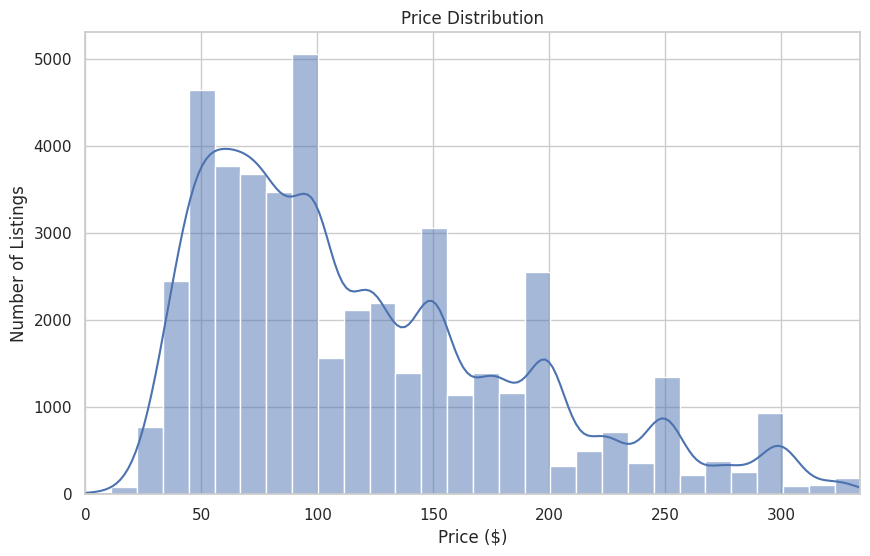

In [ ]:
# 1. Price Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], bins=30, kde=True)
plt.title('Price Distribution')
plt.xlabel('Price ($)')
plt.ylabel('Number of Listings')
plt.xlim(0, df['price'].max())
plt.show()


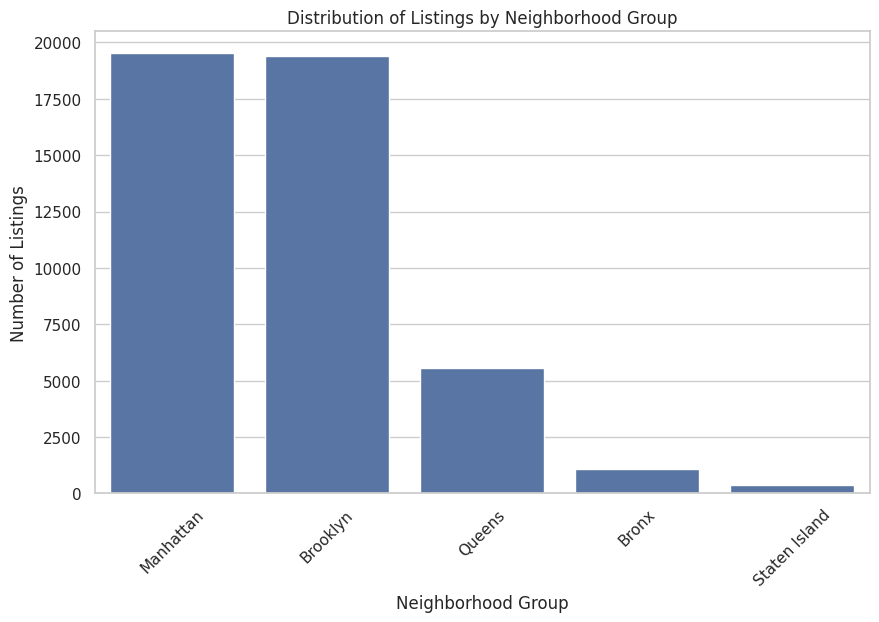

In [ ]:
# 2. Neighborhood Group Distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='neighbourhood_group', order=df['neighbourhood_group'].value_counts().index)
plt.title('Distribution of Listings by Neighborhood Group')
plt.xlabel('Neighborhood Group')
plt.ylabel('Number of Listings')
plt.xticks(rotation=45)
plt.show()

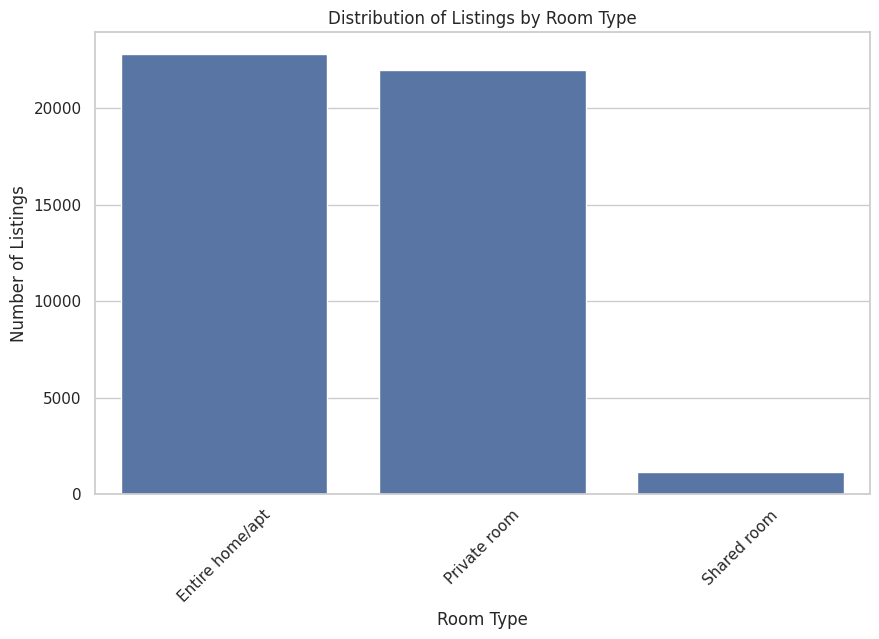

In [ ]:
# 3. Room Type Distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='room_type', order=df['room_type'].value_counts().index)
plt.title('Distribution of Listings by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Number of Listings')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Step 9: Final Checks
print("\nFinal Data Overview:")
print(df.info())
print("\nCleaned Dataset Head:")
print(df.head())

# Save the cleaned data to a new CSV file if needed
df.to_csv('cleaned_airbnb_data.csv', index=False)


Final Data Overview:
<class 'pandas.core.frame.DataFrame'>
Index: 45923 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              45923 non-null  int64  
 1   name                            45908 non-null  object 
 2   host_id                         45923 non-null  int64  
 3   host_name                       45902 non-null  object 
 4   neighbourhood_group             45923 non-null  object 
 5   neighbourhood                   45923 non-null  object 
 6   latitude                        45923 non-null  float64
 7   longitude                       45923 non-null  float64
 8   room_type                       45923 non-null  object 
 9   price                           45923 non-null  int64  
 10  minimum_nights                  45923 non-null  int64  
 11  number_of_reviews               45923 non-null  int64  
 12  last_review    